In [22]:
import toml
import pandas as pd
import seaborn as sns
from pathlib import Path
from aging.plotting import format_plots, figure, legend
from aging.size_norm.util import load_model_parameters
from toolz import groupby, valmap

In [23]:
format_plots()

In [24]:
scan_path = Path('/n/groups/datta/win/longtogeny/size_norm/models/bottleneck_optimization_00/stage_02')

In [25]:
metrics = sorted(scan_path.glob('**/metrics.csv'))
results = load_model_parameters(metrics)
results = results.groupby('file').apply(lambda x: x.loc[x['epoch'] == x['epoch'].max()]).reset_index(drop=True)

In [26]:
results[['file', 'curriculum_learning']]

,file,curriculum_learning
0,/n/groups/datta/win/longtogeny/size_norm/model...,True
1,/n/groups/datta/win/longtogeny/size_norm/model...,False


<Axes: xlabel='curriculum_learning', ylabel='vae_val_mse'>

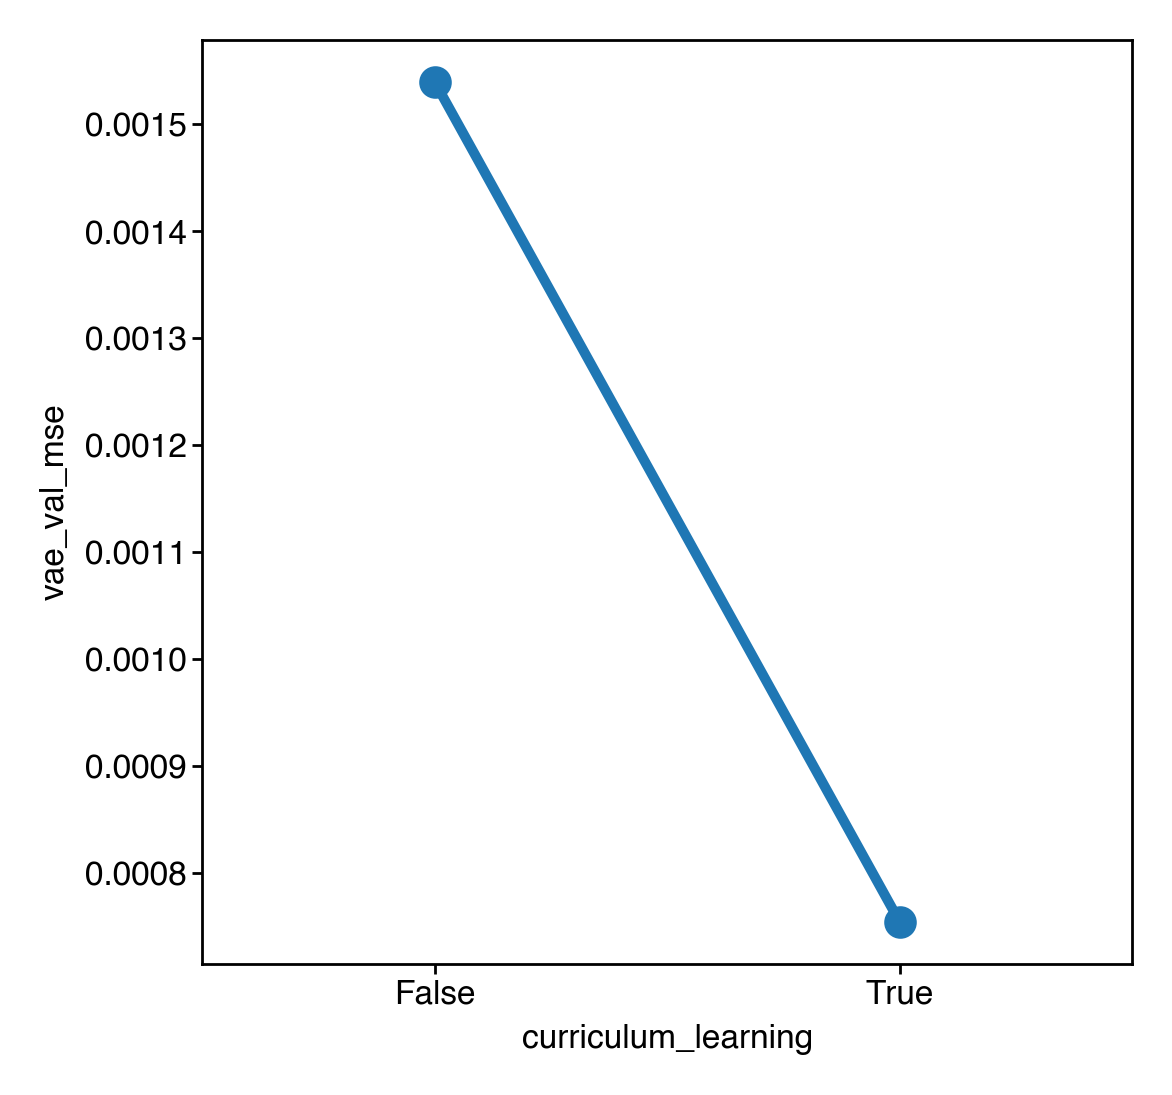

In [27]:
sns.pointplot(data=results, x='curriculum_learning', y='vae_val_mse')

In [28]:
grouped_files = groupby(lambda x: x.parents[2], metrics)
dfs = valmap(lambda x: pd.concat([pd.read_csv(f) for f in x]).set_index('step').sort_index(), grouped_files)

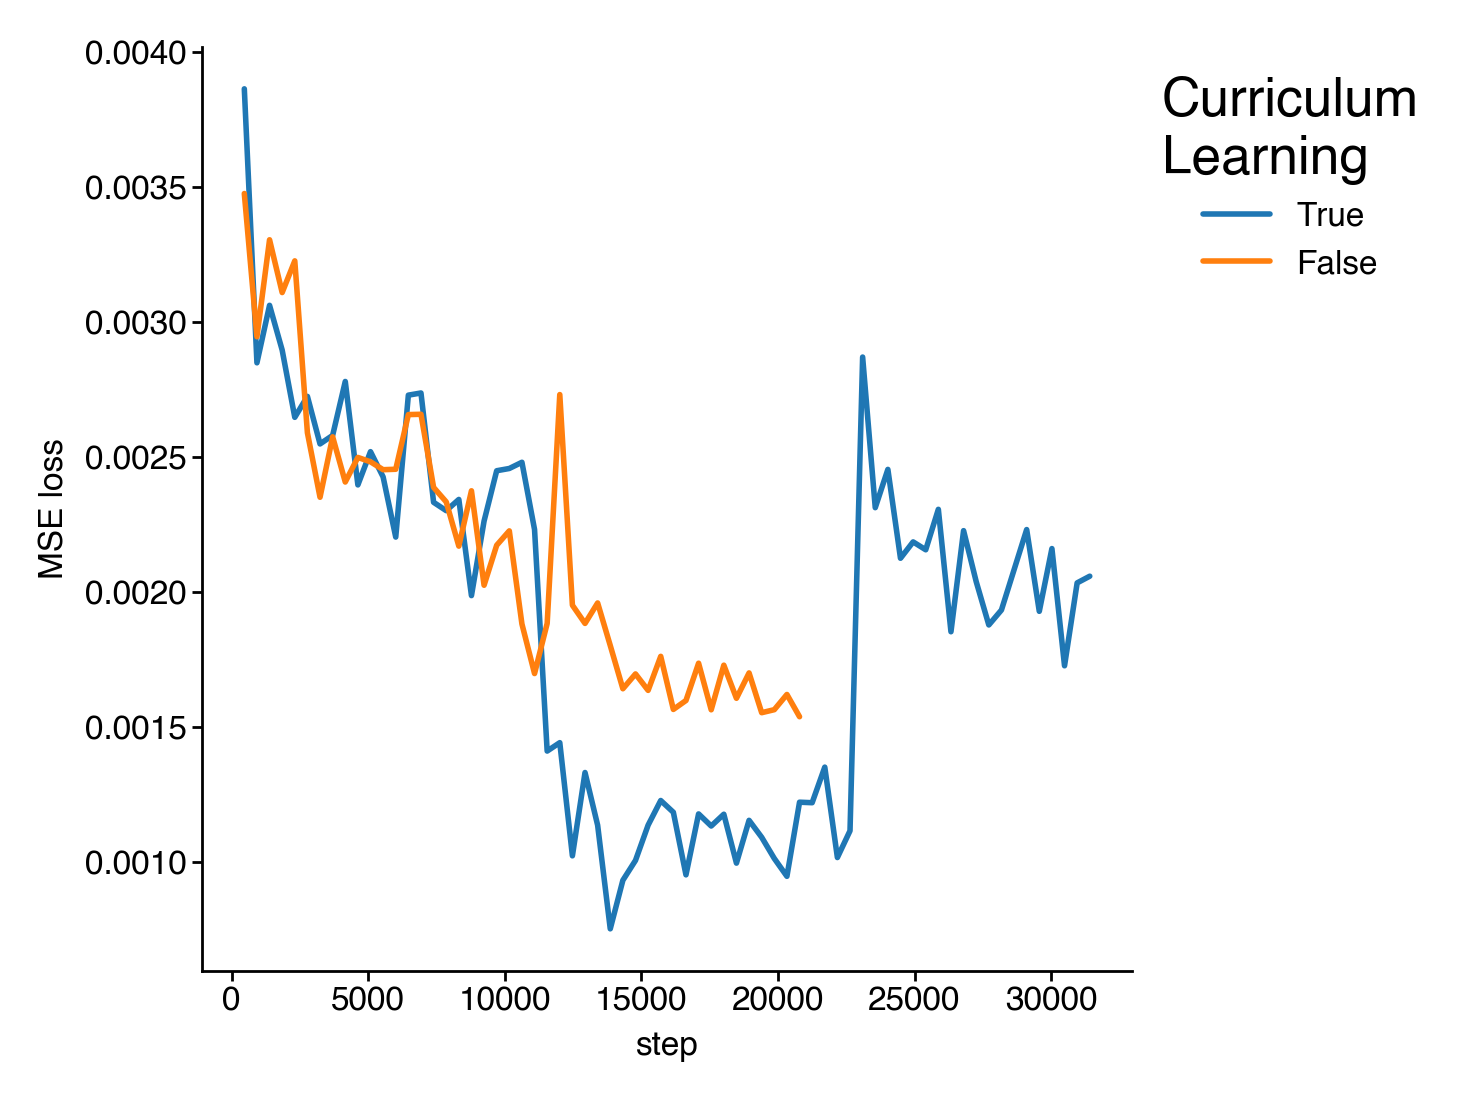

In [29]:
for k, v in dfs.items():
    config = toml.load(k / "config.toml")
    ax = v['val_mse_loss'].dropna().plot(label=config['model']['lightning']['use_curriculum_learning'])
ax.set(ylabel='MSE loss')
sns.despine()
legend(title="Curriculum\nLearning")

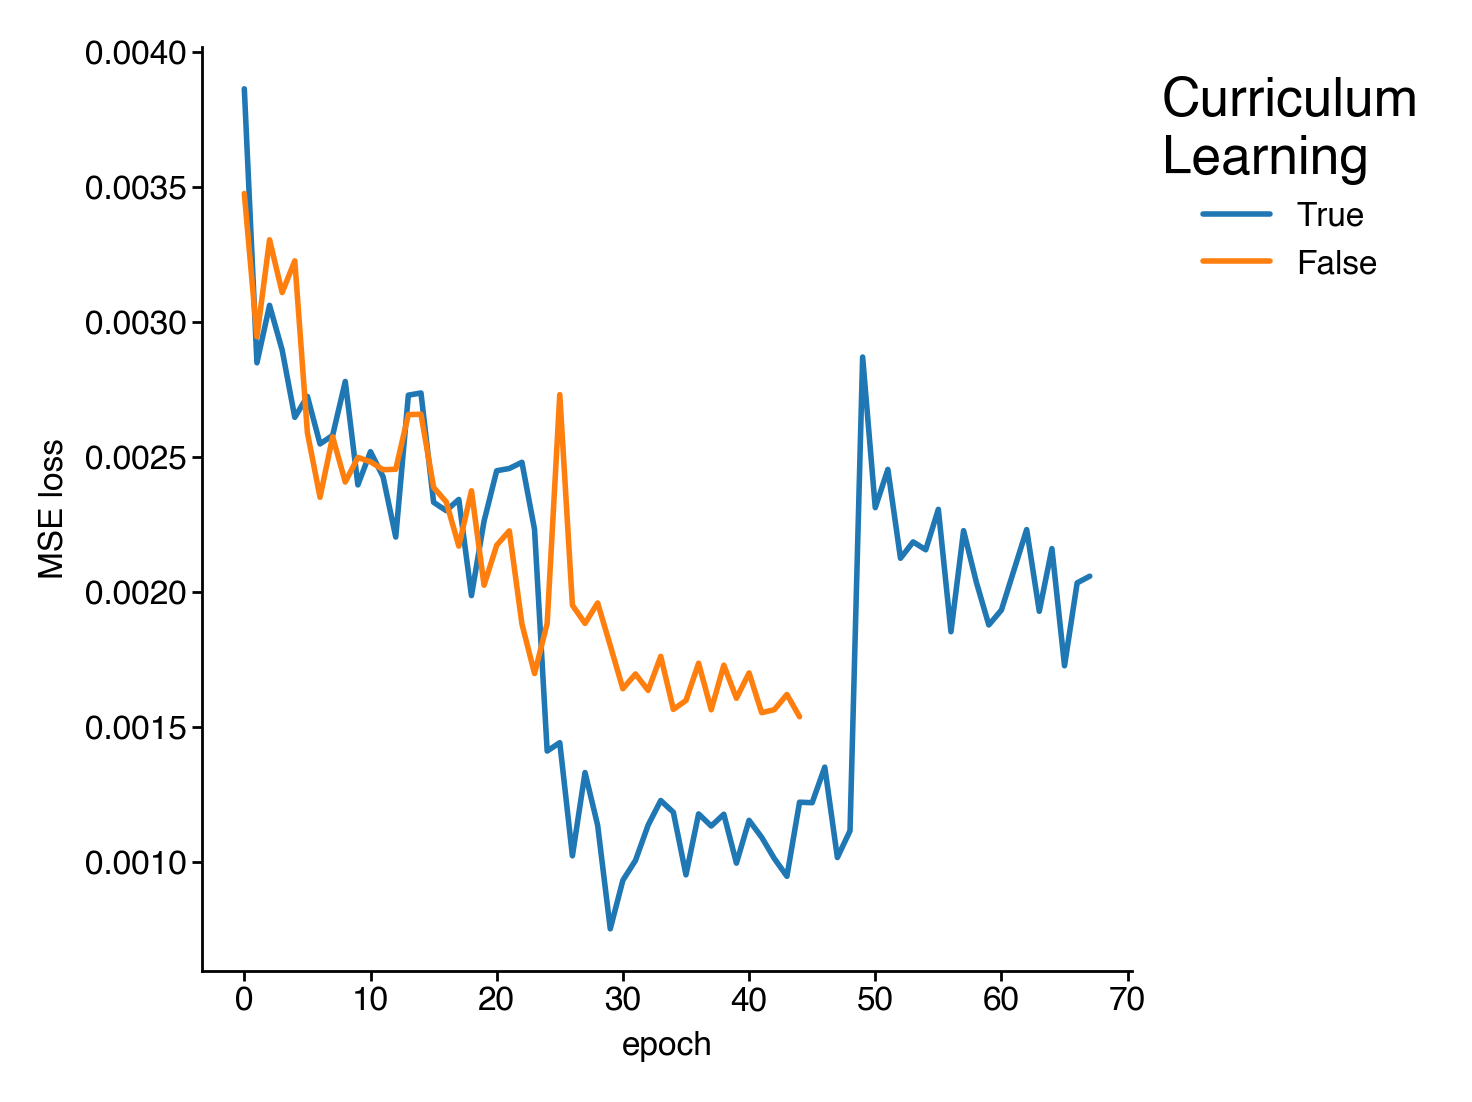

In [30]:
for k, v in dfs.items():
    config = toml.load(k / "config.toml")
    ax = v.set_index('epoch')['val_mse_loss'].dropna().plot(label=config['model']['lightning']['use_curriculum_learning'])
ax.set(ylabel='MSE loss')
sns.despine()
legend(title="Curriculum\nLearning")

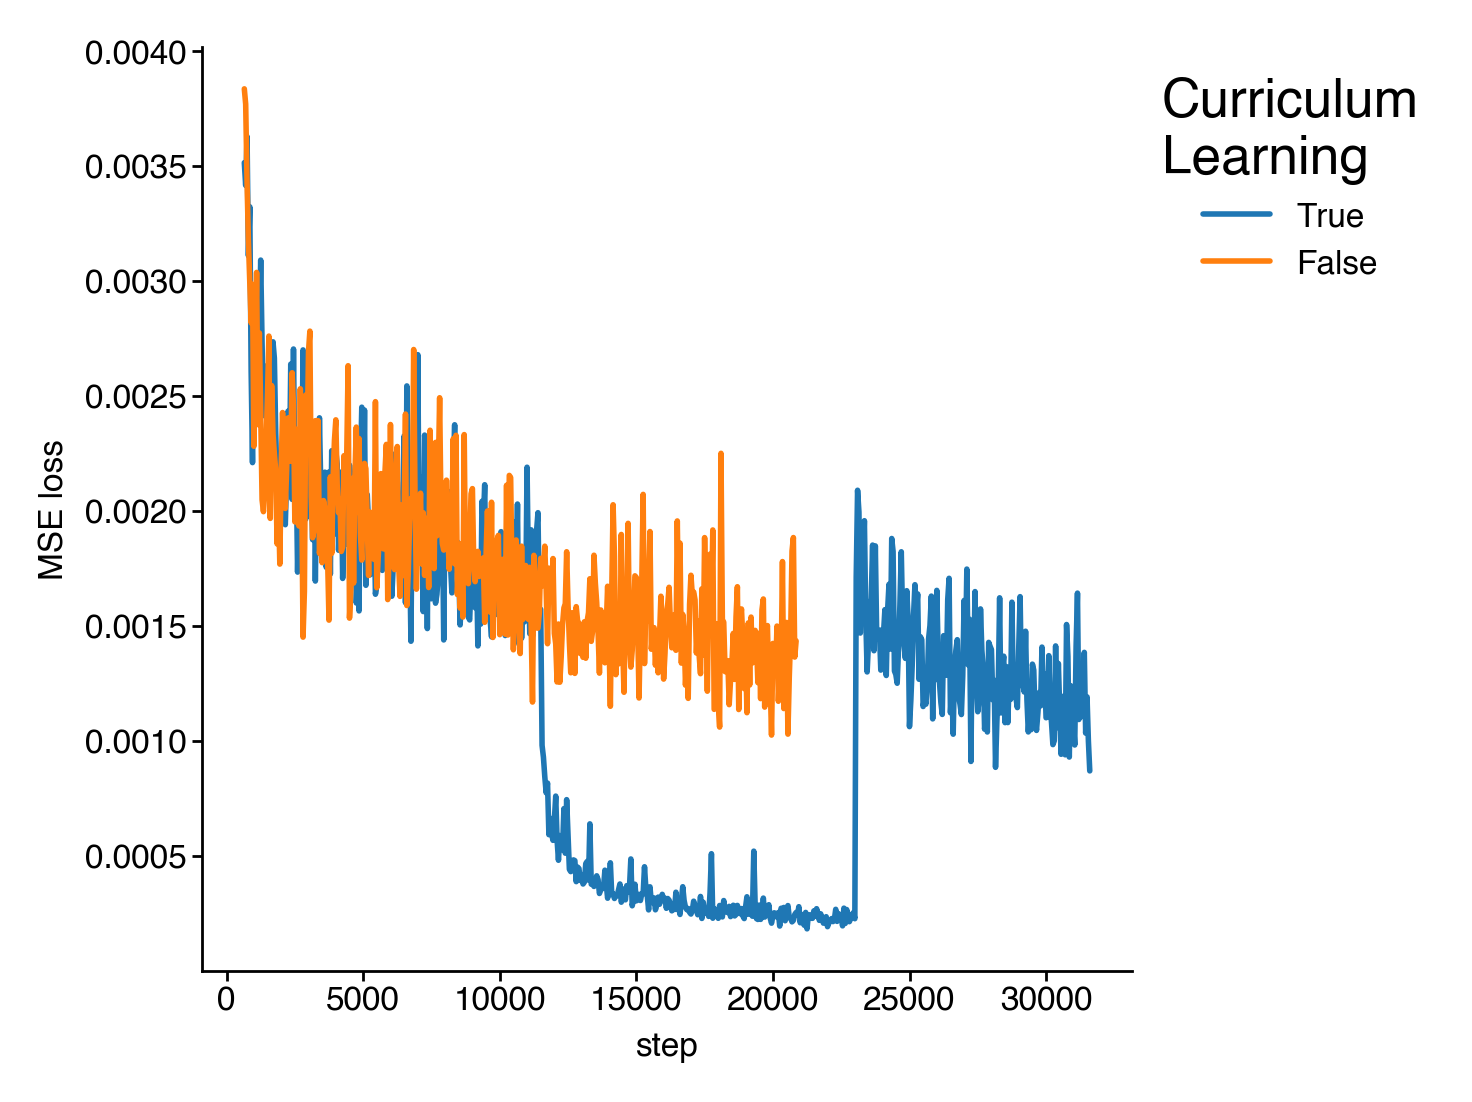

In [31]:
max_step = max(x.index.max() for x in dfs.values())

for k, v in dfs.items():
    config = toml.load(k / "config.toml")
    ax = v.loc[:max_step, 'mse_loss'].dropna().iloc[12:].plot(label=config['model']['lightning']['use_curriculum_learning'])
ax.set(ylabel='MSE loss')
sns.despine()
legend(title="Curriculum\nLearning")